In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Flatten,Dense,Dropout,Flatten,BatchNormalization,MaxPool2D
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train,x_test = x_train/255,x_test/255


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
i = Input(shape = x_train.shape[1:])
x = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2))(x)

x = Conv2D(64,(3,3),activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation = 'relu',padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2))(x)

x = Conv2D(128,(3,3),activation = 'relu',padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation = 'relu',padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(10,activation = 'softmax')(x)

model = Model(i,x)



In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
r = model.fit(x_train,y_train,validation_data= (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 23s 8ms/step - loss: 0.1321 - accuracy: 0.9610 - val_loss: 0.0687 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0578 - accuracy: 0.9832 - val_loss: 0.0408 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0464 - accuracy: 0.9866 - val_loss: 0.0248 - val_accuracy: 0.9928
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0421 - accuracy: 0.9881 - val_loss: 0.0415 - val_accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0375 - accuracy: 0.9895 - val_loss: 0.0277 - val_accuracy: 0.9920
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0310 - accuracy: 0.9916 - val_loss: 0.0261 - val_accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0317 - accuracy: 0.9920 - val_loss: 0.0268 - val_ac

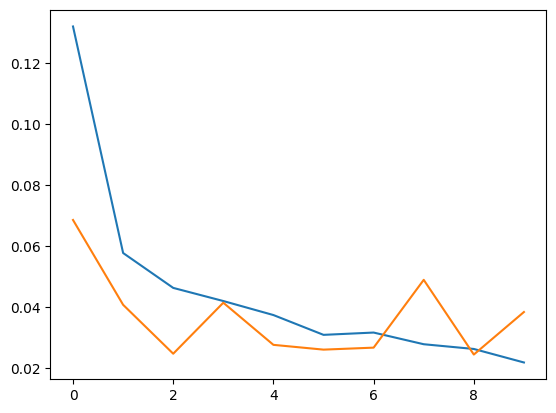

In [ ]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.show()

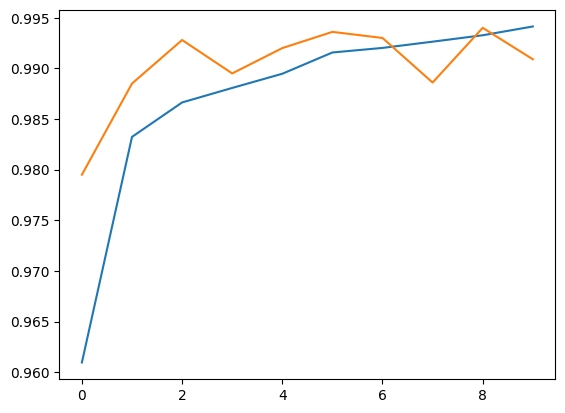

In [ ]:
plt.plot(r.history['accuracy'],label = 'loss')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.show()

In [ ]:
pred = model.predict(x_test)
print(pred)

313/313 [==============================] - 1s 2ms/step
[[2.39431629e-20 1.63099487e-13 2.87586479e-17 ... 1.00000000e+00
  2.88202822e-23 7.96186519e-11]
 [4.32461733e-10 2.39004212e-08 1.00000000e+00 ... 6.42519631e-12
  5.14655318e-10 3.14004279e-17]
 [2.39812076e-11 1.00000000e+00 2.90933922e-12 ... 2.52289010e-12
  1.63271225e-14 7.02282005e-16]
 ...
 [3.43694941e-31 4.49816940e-21 8.57378559e-28 ... 1.05797702e-22
  2.70765721e-27 1.65931893e-18]
 [2.83022722e-20 2.45098365e-20 8.09604513e-18 ... 2.32518270e-17
  1.57852236e-12 1.87396754e-18]
 [1.06228824e-14 5.46955706e-19 1.16471360e-19 ... 8.47671487e-27
  4.00290627e-14 1.73632274e-22]]


In [ ]:
#predictions made  by the model for the first 4 samples

y_pred = np.argmax(pred[0:4],axis = 1)
print(y_pred)

[7 2 1 0]


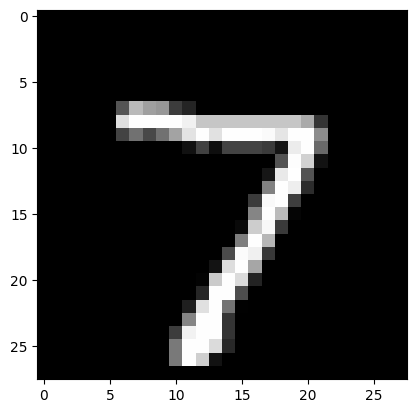

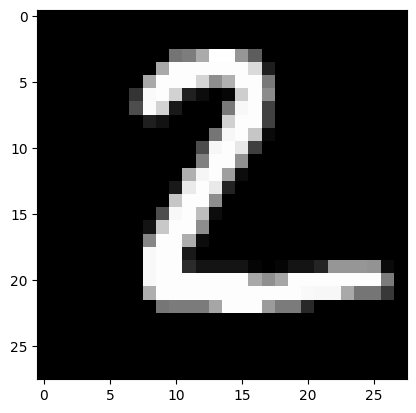

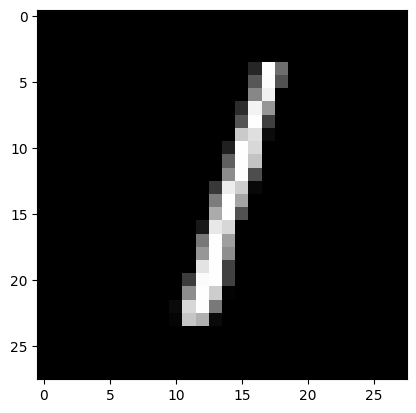

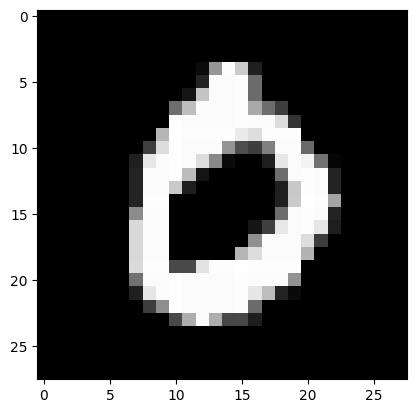

In [ ]:
#actual first 4 numbers in the dataset



for i in range (0,4):
  first_img=x_test[i]
  first_img=np.array(first_img,dtype='float')
  pixels=first_img.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()

In [ ]:
#All the 4 Predictions are made correctly